In [1]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y  = make_circles(n_samples,
                     noise = 0.03,
                     random_state = 42) 

X[0].shape, y[0]

((2,), 1)

In [2]:
import pandas as pd
circle = pd.DataFrame({"X0":X[:,0] , "X1": X[:,1], "label": y})
circle

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


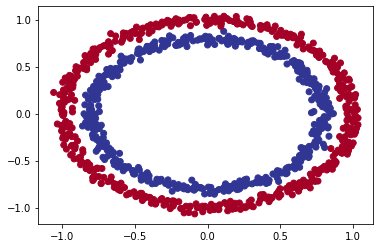

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0] ,  X[:,1], c= y, cmap = plt.cm.RdYlBu)


In [4]:
X.shape


(1000, 2)

In [5]:
y.shape

(1000,)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.2,random_state=42)

In [15]:
import tensorflow as tf

tf.random.set_seed(42)

model1 = tf.keras.Sequential([
                              tf.keras.layers.Dense(4, activation="relu"),
                              tf.keras.layers.Dense(4, activation="relu"),
                              tf.keras.layers.Dense(1, activation="sigmoid")
])

model1.compile(loss = tf.keras.losses.binary_crossentropy,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])


 
history = model1.fit(X_train,y_train, epochs = 100, verbose = 0, )



In [16]:
model1.evaluate(X_test,y_test)


7/7 [==============================] - 0s 2ms/step - loss: 0.5186 - accuracy: 0.7600


[0.5186209678649902, 0.7599999904632568]

Doing binary clasification


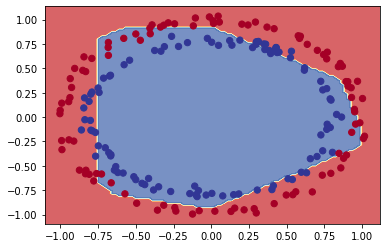

In [17]:
import numpy as np

def plot_decision_boundary(model, X , y ):

  ##Define the axis boundaries of the plot
  x_min, x_max = X[:,0].min() -0.1, X[:,0].max() +0.1
  y_min, y_max = X[:,1].min() -0.1, X[:,1].max() +0.1

  
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min,y_max,100))
  #Create X value 


  x_in = np.c_[xx.ravel(), yy.ravel()]


  #Prediccion
  y_pred = model.predict(x_in)
  #Check for multi-class
  if len (y_pred[0]) >1:
    print("doing multiclass clasification")
    y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)

  else:
    print("Doing binary clasification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx,yy,y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)

  plt.scatter(X[:,0], X[:,1], c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


plot_decision_boundary(model1, X=X_test, y=y_test)



Text(0.5, 0, 'expochs')

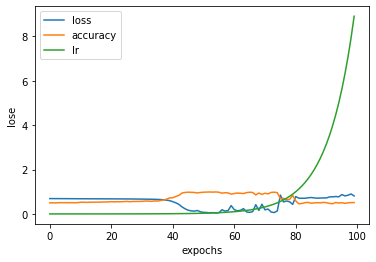

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("lose")
plt.xlabel("expochs")

# We can notice that the best point of the model is when epochs is arroung 45-70, So we need to improve this

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("lose")
plt.xlabel("expochs")

How to find the ideal learning Rate
1) Callbaxks LearnignRateScheduler)


In [ ]:


import tensorflow as tf

tf.random.set_seed(42)

model2 = tf.keras.Sequential([
                              tf.keras.layers.Dense(4, activation="relu"),
                              tf.keras.layers.Dense(4, activation="relu"),
                              tf.keras.layers.Dense(1, activation="sigmoid")
])

model2.compile(loss = tf.keras.losses.binary_crossentropy,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 *10**(epoch/20))
 
history_2 = model2.fit(X_train,y_train, epochs = 55, verbose = 0, callbacks=[lr_scheduler])


In [ ]:
model2.evaluate(X_test,y_test)
y_preds_2 = model2.predict(X_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1423 - accuracy: 0.9350


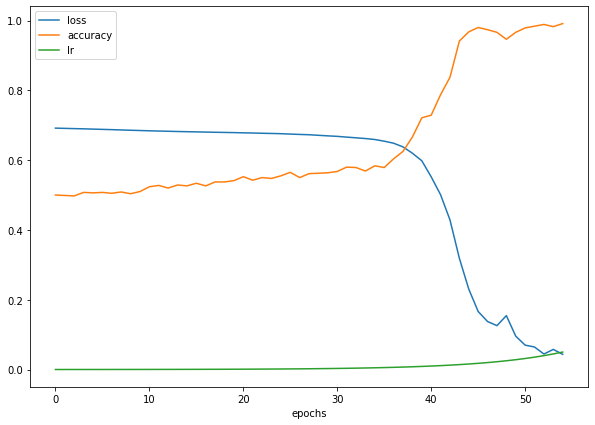

In [ ]:
pd.DataFrame(history_2.history).plot(figsize=(10,7), xlabel = "epochs")

Text(0, 0.5, 'Loss')

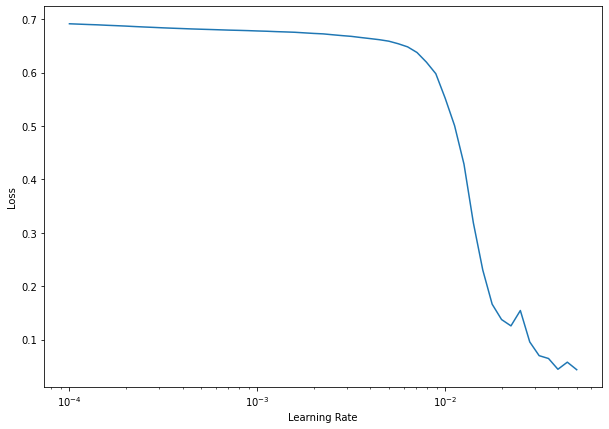

In [ ]:
lrs = 1e-4 *(10**(tf.range(55)/20))

plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_2.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

Now We notice that the best learning rete is between 0,001 and 0,01.

More Evaluation metrics
* Acurracy 
* Precision
* Recall
* F1-Score
* Confusion Matrix
* Classification Report


In [ ]:
loss, accuracy =  model2.evaluate(X_test, y_test)
loss, accuracy

7/7 [==============================] - 0s 3ms/step - loss: 0.1423 - accuracy: 0.9350


(0.14234888553619385, 0.9350000023841858)

In [ ]:
y_preds_2_binary = tf.round(y_preds_2)


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix_model = confusion_matrix(y_test, y_preds_2_binary)
confusion_matrix_model

array([[ 87,  13],
       [  0, 100]])

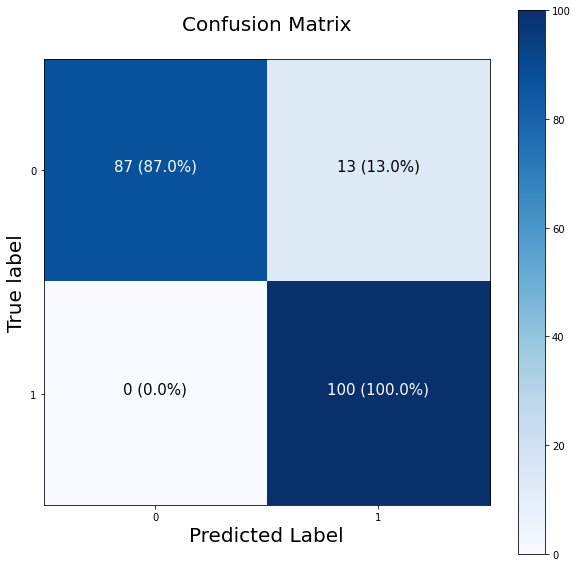

In [ ]:
import itertools

figsize = (10,10)

cm = confusion_matrix(y_test,y_preds_2_binary )
cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]

n_clases = cm.shape[0]

fig,ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm , cmap = plt.cm.Blues)
fig.colorbar(cax)


classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])


ax.set(title = "Confusion Matrix",
       xlabel = "Predicted Label",
       ylabel = "True label",
       xticks = np.arange(n_clases),
       yticks = np.arange(n_clases),
       xticklabels=labels,
       yticklabels=labels)

ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()


ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)
threshold = (cm.max() + cm.min())/2

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment = "center",
           color = "white" if cm[i,j]> threshold else"black",
           size = 15)